In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
!pip install -q keras

In [3]:
import numpy as np
import keras
from keras import backend as k 
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
test_path ='/content/drive/MyDrive/Colab Notebooks/training/test'
train_path = '/content/drive/MyDrive/Colab Notebooks/training/train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/training/valid'

In [5]:
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['dr','nodr'], batch_size=10)
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['dr','nodr'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['dr','nodr'], batch_size=10)

Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [6]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0] is np.ndarray):
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [7]:
imgs , labels = next(train_batches)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


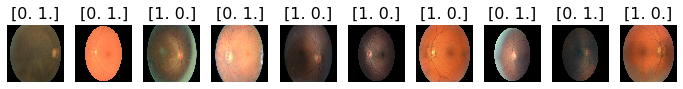

In [8]:
plots(imgs, titles=labels)

In [9]:
vgg16_model = keras.applications.vgg16.VGG16()

553476096/553467096 [==============================] - 3s 0us/step


In [10]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
type(vgg16_model)

keras.engine.functional.Functional

In [12]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [14]:
for layer in model.layers:
    layer.trainable = False 

In [15]:
model.add(Dense(2, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [17]:
model.compile(Adam(learning_rate=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(train_batches, steps_per_epoch=4,
                   validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
4/4 - 71s - loss: 0.9213 - accuracy: 0.4500 - val_loss: 0.8932 - val_accuracy: 0.6250 - 71s/epoch - 18s/step
Epoch 2/5
4/4 - 50s - loss: 0.8139 - accuracy: 0.5750 - val_loss: 1.0123 - val_accuracy: 0.5000 - 50s/epoch - 13s/step
Epoch 3/5
4/4 - 50s - loss: 0.7340 - accuracy: 0.6250 - val_loss: 0.9588 - val_accuracy: 0.4750 - 50s/epoch - 13s/step
Epoch 4/5
4/4 - 50s - loss: 0.6646 - accuracy: 0.7000 - val_loss: 0.8952 - val_accuracy: 0.5250 - 50s/epoch - 13s/step
Epoch 5/5
4/4 - 53s - loss: 0.6109 - accuracy: 0.6750 - val_loss: 0.8678 - val_accuracy: 0.5000 - 53s/epoch - 13s/step


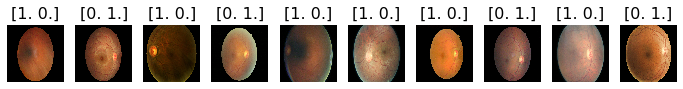

In [19]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [20]:
test_labels = test_labels[:,0]
test_labels

array([1., 0., 1., 0., 1., 1., 1., 0., 1., 0.], dtype=float32)

In [21]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        
        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

In [22]:
predictions = model.predict(test_batches, steps=1, verbose=0)

In [27]:
cm = confusion_matrix(test_labels, np.round(predictions[:,0]))

Confusion matrix, without normalization
[[2 2]
 [2 4]]


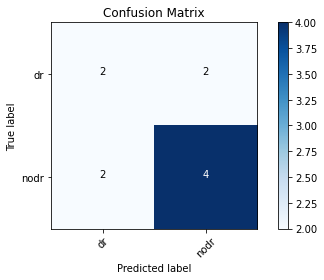

In [28]:
cm_plot_labels = ['dr','nodr']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')

In [29]:
model.save('diabetic_retinopathy.h5')

In [30]:
import base64
import numpy as np
import io
from PIL import Image
import keras
from keras import backend as K
from keras.models import Sequential 
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array

import json
import h5py
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import socket

Instructions for updating:
non-resource variables are not supported in the long term


In [31]:
def fix_layer0(filename, batch_input_shape, dtype):
    with h5py.File(filename, 'r+') as f:
        model_config = json.loads(f.attrs['model_config'])
        layer0 = model_config['config']['layers'][0]['config']
        layer0['batch_input_shape'] = batch_input_shape
        layer0['dtype'] = dtype
        f.attrs['model_config'] = json.dumps(model_config).encode('utf-8')

def get_model():
    global model,graph
    model = load_model('diabetic_retinopathy.h5')
    print(" * Model Loaded!!")
    graph = tf.get_default_graph()
    
def preprocess_image(image, target_size):
    if image.mode != "RGB":
        image = image.convert("RGB")
    image = image.resize(target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    
    return image

print(" * Loading keras model.....")
fix_layer0('diabetic_retinopathy.h5', [None, 224, 224,3], 'float32')
get_model()

 * Loading keras model.....
 * Model Loaded!!


In [33]:
with graph.as_default(): 
        image = Image.open(r"/content/drive/MyDrive/Colab Notebooks/dataset/1002_left.jpeg")
        image.show()
        processed_image = preprocess_image(image, target_size=(224, 224))
        prediction = model.predict(processed_image).tolist()

        for i in range(0,int(len(prediction))):
          tempDr = prediction[i][0]
          tempndr = prediction[i][1]
          if tempDr>tempndr:
            print("Diabetic Retinopathy")
          elif tempDr<tempndr:
            print("NO Diabetic Retinopathy")

NO Diabetic Retinopathy
